# Research Tools

Collection of general metric calculations and drawing graphs for research.

In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
from utils import cvt_to_onehot, plot_confusion_matrix

- - -

## Prepare Data

In [2]:
Y_test_idx = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Y_pred_idx = [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]

In [3]:
# One-hot encoding
Y_test = cvt_to_onehot(Y_test_idx, dim=2)
Y_pred = cvt_to_onehot(Y_pred_idx, dim=2)

- - -

## Calculate precision, recall, fscore and support.

In [4]:
(precision,
 recall,
 fscore,
 support) = metrics.precision_recall_fscore_support(y_true=Y_test_idx,
                                                    y_pred=Y_pred_idx,
                                                    beta=1.,
                                                    average='binary')

In [5]:
print("precision: {}\nrecall: {}\nfscore: {}\nsupport: {}".format(
        precision, recall, fscore, support))

precision: 0.6666666666666666
recall: 0.6666666666666666
fscore: 0.6666666666666666
support: None


- - -

## Draw ROC curve and Calculate AUC

AUC: 0.6333333333333333


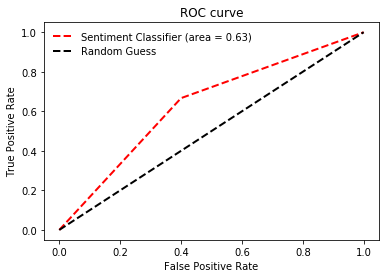

In [6]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test_idx, Y_pred[:, 1], pos_label=1)
auc_score = metrics.auc(fpr, tpr)

title = 'ROC curve'
fig = plt.figure(title)
ax = fig.add_subplot(111)
ax.plot(fpr, tpr, linestyle='--', lw=2, color='r',
        label='Sentiment Classifier (area = {:.2f})'.format(auc_score))
ax.plot([0., 1.], [0., 1.], linestyle='--', lw=2, color='k',
        label='Random Guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(title)
ax.legend(loc='best', frameon=False)

print("AUC: {}".format(auc_score))

## Confusion Matrix

Normalized confusion matrix
Confusion Matrix
[[3 2]
 [2 4]]


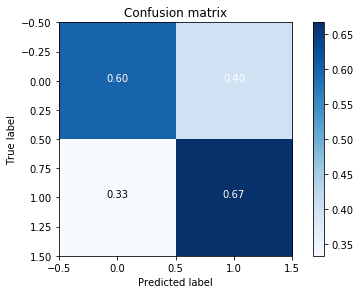

In [7]:
cm = metrics.confusion_matrix(Y_test_idx, Y_pred_idx)
classes = ['bad', 'good']
title = 'Confusion matrix'
fig, ax = plot_confusion_matrix(cm,
                                classes=classes,
                                normalize=True,
                                title=title)

print("Confusion Matrix")
print(cm)